In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("mouse_viral_study.csv")

In [3]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


In [4]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


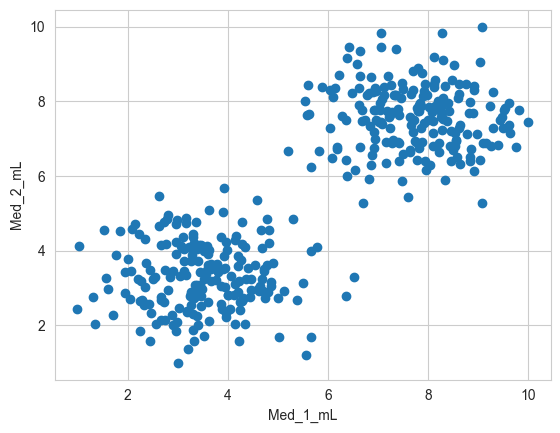

In [5]:
plt.plot(df["Med_2_mL"],df["Med_1_mL"],'o')
plt.xlabel('Med_1_mL')
plt.ylabel('Med_2_mL')
plt.show()

In [6]:
x = df[['Med_1_mL']]
y = df[['Med_2_mL']]

In [7]:
x.shape

(400, 1)

In [8]:
y.shape

(400, 1)

In [9]:
degree = 17
X = np.hstack([x ** i for i in range(1, degree + 1)])

print(X.shape)

(400, 17)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
def z_score_normalization(data):
    # Calcul des moyennes et des déviations standard de chaque caractéristique
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)

    # Normalisation des données en utilisant la méthode Z-score
    data_normalized = (data - mean) / std

    return data_normalized, mean, std

In [12]:
x_train_norm, mean, std = z_score_normalization(X_train)
x_train_norm

array([[-0.74311154, -0.82952049, -0.84343955, ..., -0.27089091,
        -0.24623756, -0.22504139],
       [ 0.91914146,  0.87654002,  0.7924221 , ..., -0.11645581,
        -0.12742792, -0.13396699],
       [-0.54252169, -0.68545558, -0.75028439, ..., -0.2708735 ,
        -0.24622999, -0.22503812],
       ...,
       [-1.1227261 , -1.05572812, -0.96538704, ..., -0.27089443,
        -0.2462389 , -0.22504189],
       [-0.99715199, -0.98762541, -0.93214625, ..., -0.27089423,
        -0.24623883, -0.22504187],
       [-1.15315461, -1.07122969, -0.97248922, ..., -0.27089445,
        -0.2462389 , -0.22504189]])

In [13]:
x_train_norm.mean()

-1.0449157878825003e-17

In [14]:
x_train_norm.std()

1.0

In [15]:
mean

array([5.37557174e+00, 3.41463765e+01, 2.39913703e+02, 1.78602885e+03,
       1.37632076e+04, 1.08498594e+05, 8.69831497e+05, 7.07039110e+06,
       5.81779077e+07, 4.84168056e+08, 4.07313433e+09, 3.46259878e+10,
       2.97368646e+11, 2.57925878e+12, 2.25882791e+13, 1.99677164e+14,
       1.78107520e+15])

In [16]:
std

array([2.29120164e+00, 2.49008799e+01, 2.25698935e+02, 1.96989645e+03,
       1.71680567e+04, 1.51175536e+05, 1.35005627e+06, 1.22346530e+07,
       1.12426010e+08, 1.04611586e+09, 9.84089043e+09, 9.34390584e+10,
       8.94143376e+11, 8.61173230e+12, 8.33840459e+13, 8.10908242e+14,
       7.91441605e+15])

In [17]:
x_test_norm = (X_test - mean)/std


In [18]:
X_train = np.hstack((x_train_norm, np.ones((X_train.shape[0], 1))))
X_test = np.hstack((x_test_norm, np.ones((X_test.shape[0], 1))))

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 18)
(80, 18)
(320, 1)
(80, 1)


In [20]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(18,1)
print('Theta:',theta)

Theta: [[ 1.76405235]
 [ 0.40015721]
 [ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [-0.97727788]
 [ 0.95008842]
 [-0.15135721]
 [-0.10321885]
 [ 0.4105985 ]
 [ 0.14404357]
 [ 1.45427351]
 [ 0.76103773]
 [ 0.12167502]
 [ 0.44386323]
 [ 0.33367433]
 [ 1.49407907]
 [-0.20515826]]


In [21]:
def model(X, theta):
    return np.dot(X, theta)
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [22]:
cost_function(X_train, y_train, theta)

/home/houssam/Documents/ENSET/s4/ai/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Med_2_mL    62.096516
dtype: float64

In [23]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [24]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [25]:
# Entrainement du modèle
n_iterations = 10000
learning_rate = 0.03
theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)

/home/houssam/Documents/ENSET/s4/ai/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/tmp/ipykernel_17453/191099771.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]


In [26]:
theta_final

array([[-0.89297031],
       [ 0.76033493],
       [ 2.08945033],
       [ 2.90538359],
       [ 1.692079  ],
       [-1.91468599],
       [-0.46759795],
       [-1.73844116],
       [-1.61026529],
       [-0.8597083 ],
       [-0.82197567],
       [ 0.79048493],
       [ 0.35122612],
       [-0.10773011],
       [ 0.31188257],
       [ 0.21746532],
       [ 1.31973073],
       [ 5.58344633]])

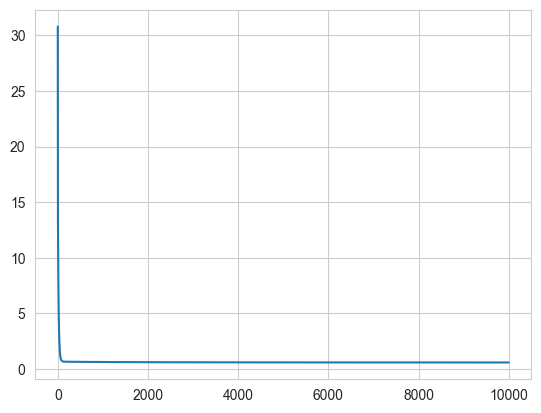

In [27]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [28]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [29]:
predictions_train = model(X_train, theta_final)
coef_determination_regression_polynomiale_train = coef_determination(y_train, predictions_train)
coef_determination_regression_polynomiale_train

Med_2_mL    0.783293
dtype: float64

In [30]:
predictions_test = model(X_test, theta_final)
coef_determination_regression_polynomiale_test = coef_determination(y_test, predictions_test)
coef_determination_regression_polynomiale_test

Med_2_mL    0.706593
dtype: float64

## Correction l'overfitting en régularisant le modèle en utilisant la régularisation L1- LASSO

In [31]:
def cost_function_(X, y, theta,a):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2) + a/m * np.linalg.norm(theta, ord=1)

def grad_(X, y, theta,a):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y) + a/m * theta *np.sign(theta)

In [32]:
def gradient_descent_(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad_(X, y, theta,1) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function_(X, y, theta,1) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [33]:
# Entrainement du modèle
n_iterations = 10000
learning_rate = 0.03
theta_final_L1, cost_history_L1 = gradient_descent_(X_train, y_train, theta, learning_rate, n_iterations)

/home/houssam/Documents/ENSET/s4/ai/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/tmp/ipykernel_17453/3606438354.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cost_history[i] = cost_function_(X, y, theta,1) # on enregistre la valeur du Cout au tour i dans cost_history[i]


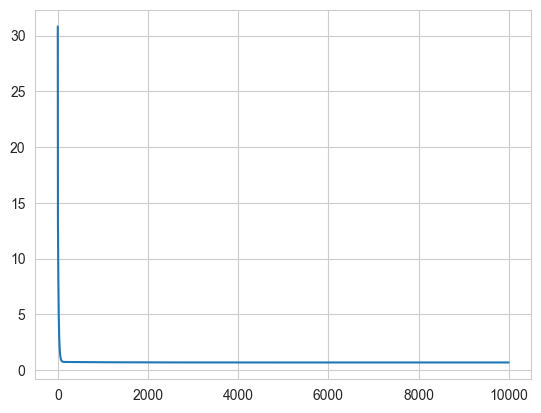

In [34]:
plt.plot(range(n_iterations), cost_history_L1)
plt.show()

In [43]:
predictions_train_L1 = model(X_train, theta_final_L1)
coef_determination_regression_polynomiale_train_L1 = coef_determination(y_train, predictions_train_L1)
coef_determination_regression_polynomiale_train_L1

Med_2_mL    0.783636
dtype: float64

In [44]:
predictions_test_L1 = model(X_test, theta_final_L1)
coef_determination_regression_polynomiale_test_L1 = coef_determination(y_test, predictions_test_L1)
coef_determination_regression_polynomiale_test_L1

Med_2_mL    0.707667
dtype: float64

## Correction l'overfitting en régularisant le modèle en utilisant la régularisation L2


In [37]:
def cost_function__(X, y, theta,a):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2) + a/(2*m) * np.sum(theta[0:len(theta)-1]**2)

def grad__(X, y, theta,a):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y) + a/m * theta

In [38]:
def gradient_descent__(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad__(X, y, theta,1) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function__(X, y, theta,1) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [39]:
# Entrainement du modèle
n_iterations = 10000
learning_rate = 0.03
theta_final_L2, cost_history_L2 = gradient_descent__(X_train, y_train, theta, learning_rate, n_iterations)

/home/houssam/Documents/ENSET/s4/ai/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/tmp/ipykernel_17453/123061717.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cost_history[i] = cost_function__(X, y, theta,1) # on enregistre la valeur du Cout au tour i dans cost_history[i]


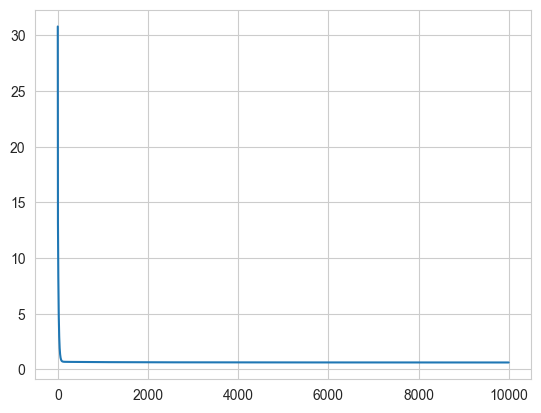

In [40]:
plt.plot(range(n_iterations), cost_history_L2)
plt.show()

In [45]:
predictions_train_L2 = model(X_train, theta_final_L2)
coef_determination_regression_polynomiale_train_L2 = coef_determination(y_train, predictions_train_L2)
coef_determination_regression_polynomiale_train_L2

Med_2_mL    0.780348
dtype: float64

In [46]:
predictions_test_L2 = model(X_test, theta_final_L2)
coef_determination_regression_polynomiale_test_L2 = coef_determination(y_test, predictions_test_L2)
coef_determination_regression_polynomiale_test_L2

Med_2_mL    0.702211
dtype: float64